In [1]:
import numpy as np
import pandas as pd

child_mortality = pd.read_excel(r'wholeworld_cmi.xlsx')
df_child_mortality = pd.DataFrame(data = child_mortality)
df_child_mortality.head(10)

,Location,Dim2,Indicator,Period,Dim1,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,...,FactValueNumericPrefix,DateModified,ClassBreakId,LegendLabelText,LegendColorForText,LegendColorMaxNumeric,LegendColorMinNumeric,BasemapURL,LabelMapURL,LabelMapLanguage
0,Afghanistan,HIV/AIDS,Number of deaths,2017,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,HIV/AIDS,Number of deaths,2017,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,HIV/AIDS,Number of deaths,2017,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,HIV/AIDS,Number of deaths,2016,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,HIV/AIDS,Number of deaths,2016,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,HIV/AIDS,Number of deaths,2016,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,HIV/AIDS,Number of deaths,2015,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,HIV/AIDS,Number of deaths,2015,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,HIV/AIDS,Number of deaths,2015,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,HIV/AIDS,Number of deaths,2014,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Dropping the columns with redundant and NAN Values
df_child_mortality = df_child_mortality.drop(columns=['FactValueString','FactValueUoM','FactComments','DataSourceDimValueCode','Dim3ValueCode',
                                 'SlicingDimCode','SlicingDimValueCode','LanguageName',
                                 'FactValueNumericPrefix','DateModified','ClassBreakId','LegendLabelText','LegendColorForText', 
                                 'LegendColorMaxNumeric','LegendColorMinNumeric','BasemapURL','LabelMapURL','LabelMapLanguage',
                                 'IsLatestYear','LatestYearLabel','Dim2ValueCode','SpatialDimValueCode','LanguageOrder',
                                 'TimeDimValueCode','Dim1ValueCode','FactValueForMeasure','Indicator','IndicatorCode'])

df_child_mortality = df_child_mortality.drop(df_child_mortality.columns[5], axis=1) #Cleaning the unwanted column
df_child_mortality = df_child_mortality.rename(columns={"Dim2": "Reason", "Dim1": "AgeGroup", "Period": "Year","Tooltip" : "Deaths"}, errors="raise")

print(df_child_mortality.shape)
df_child_mortality.describe()

(147762, 6)


,Year,Deaths
count,147762.000000,147762.000000
mean,2008.486397,1830.014304
std,5.183150,11319.173549
min,2000.000000,0.000000
25%,2004.000000,0.028000
50%,2008.000000,24.320000
75%,2013.000000,477.400000
max,2017.000000,487137.000000


In [3]:
new_df = df_child_mortality

x = new_df.groupby("Location").sum()
x = x.sort_values(by='Deaths', ascending=False)

list_countries = x.index.tolist()
list_countries = list_countries[0:50]

In [4]:
dataset_final = new_df[new_df.Location.isin(list_countries)]
print(dataset_final)

           Location    Reason  Year     AgeGroup   Deaths SpaceTime
0       Afghanistan  HIV/AIDS  2017    0-27 days     0.17       AFG
1       Afghanistan  HIV/AIDS  2017  1-59 months    16.83       AFG
2       Afghanistan  HIV/AIDS  2017    0-4 years    17.00       AFG
3       Afghanistan  HIV/AIDS  2016    0-27 days     0.17       AFG
4       Afghanistan  HIV/AIDS  2016  1-59 months    16.83       AFG
...             ...       ...   ...          ...      ...       ...
147757     Zimbabwe  Injuries  2001  1-59 months  1030.00       ZWE
147758     Zimbabwe  Injuries  2001    0-4 years  1106.00       ZWE
147759     Zimbabwe  Injuries  2000    0-27 days    72.03       ZWE
147760     Zimbabwe  Injuries  2000  1-59 months   957.80       ZWE
147761     Zimbabwe  Injuries  2000    0-4 years  1030.00       ZWE

[38060 rows x 6 columns]


In [6]:
dataset_final.isna().sum()
dataset_final = dataset_final[(dataset_final.SpaceTime != "WBDCP_SSA")]

category_1 = dataset_final[dataset_final.AgeGroup == "0-27 days"].index.tolist()
category_2 = dataset_final[dataset_final.AgeGroup == "1-59 months"].index.tolist()
category_3 = dataset_final[dataset_final.AgeGroup == "0-4 years"].index.tolist()

dataset_final.loc[category_1, "Category"] = "1"
dataset_final.loc[category_2, "Category"] = "2"
dataset_final.loc[category_3, "Category"] = "3"

print(dataset_final)

           Location    Reason  Year     AgeGroup   Deaths SpaceTime Category
0       Afghanistan  HIV/AIDS  2017    0-27 days     0.17       AFG        1
1       Afghanistan  HIV/AIDS  2017  1-59 months    16.83       AFG        2
2       Afghanistan  HIV/AIDS  2017    0-4 years    17.00       AFG        3
3       Afghanistan  HIV/AIDS  2016    0-27 days     0.17       AFG        1
4       Afghanistan  HIV/AIDS  2016  1-59 months    16.83       AFG        2
...             ...       ...   ...          ...      ...       ...      ...
147757     Zimbabwe  Injuries  2001  1-59 months  1030.00       ZWE        2
147758     Zimbabwe  Injuries  2001    0-4 years  1106.00       ZWE        3
147759     Zimbabwe  Injuries  2000    0-27 days    72.03       ZWE        1
147760     Zimbabwe  Injuries  2000  1-59 months   957.80       ZWE        2
147761     Zimbabwe  Injuries  2000    0-4 years  1030.00       ZWE        3

[38060 rows x 7 columns]


In [7]:
#Normalize the Data over the 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)


def normalize_yearwise_deaths_diseases(dataframe, new_df):
    for reason in dataframe.Reason.unique().tolist():
        temp_df = dataframe.loc[(dataframe.Reason == reason)]
        sum_count_years = temp_df["Deaths"].sum()
        temp_df["Deaths"] = temp_df["Deaths"]/sum_count_years
        temp_df["DeathsPercentage"] = np.multiply(temp_df["Deaths"],100)
        new_df = new_df.append(temp_df)
    
    sns.relplot(x="Year", y="Deaths",hue="Reason", style="Location",kind="line", data=new_df).set(title=new_df.iloc[0]["Location"] 
                                                                                        + ' : ' + new_df.iloc[0]["AgeGroup"])
    plt.show()
        
    return new_df

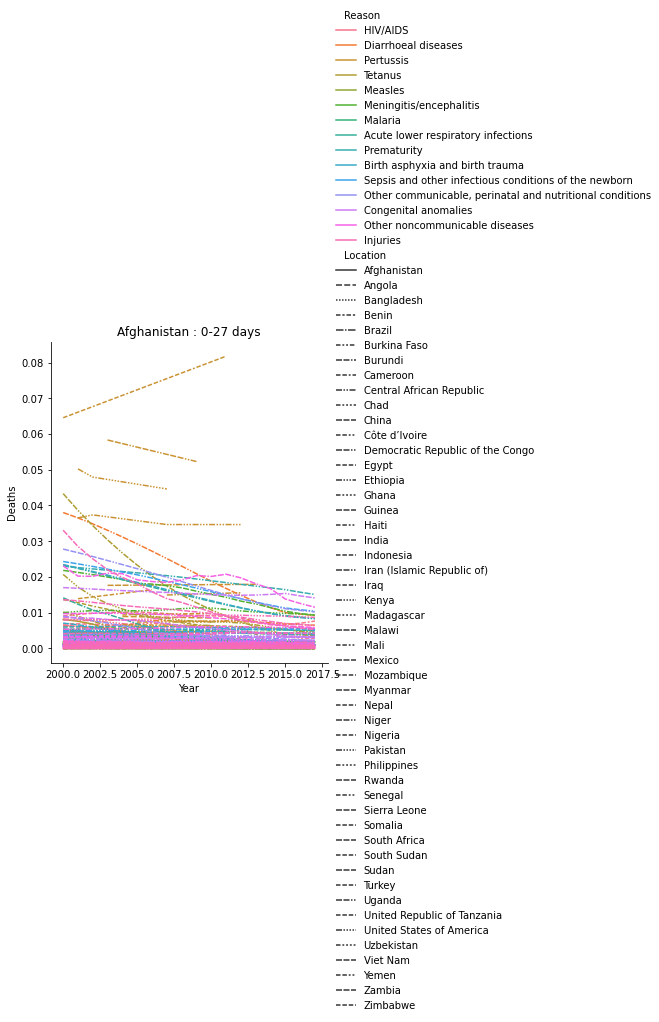

                      Year    Deaths  DeathsPercentage
Year              1.000000 -0.077506         -0.077506
Deaths           -0.077506  1.000000          1.000000
DeathsPercentage -0.077506  1.000000          1.000000


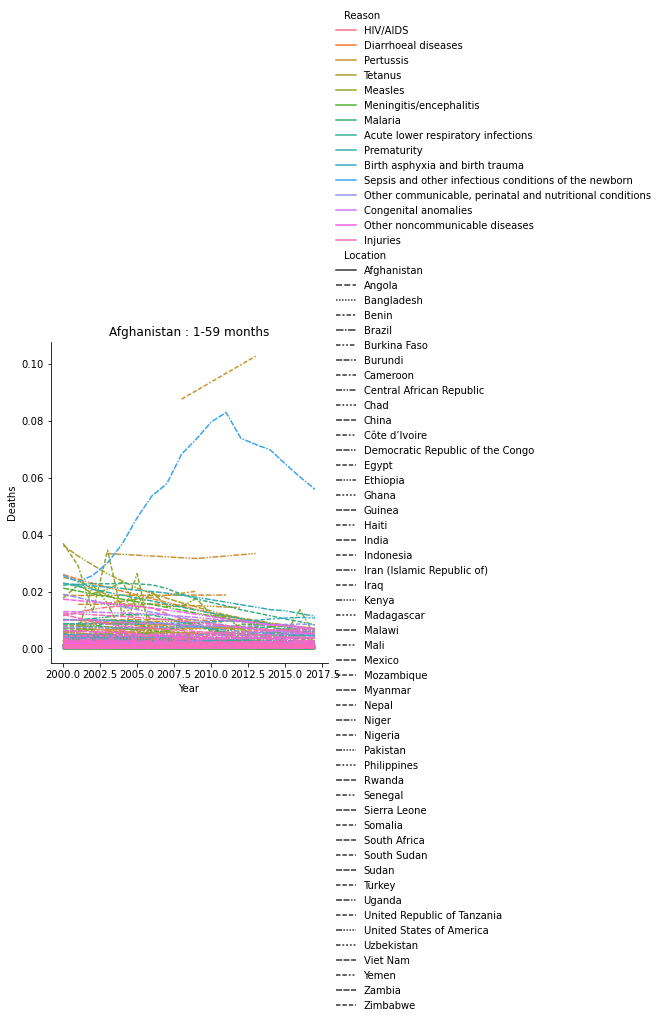

                      Year    Deaths  DeathsPercentage
Year              1.000000 -0.063181         -0.063181
Deaths           -0.063181  1.000000          1.000000
DeathsPercentage -0.063181  1.000000          1.000000


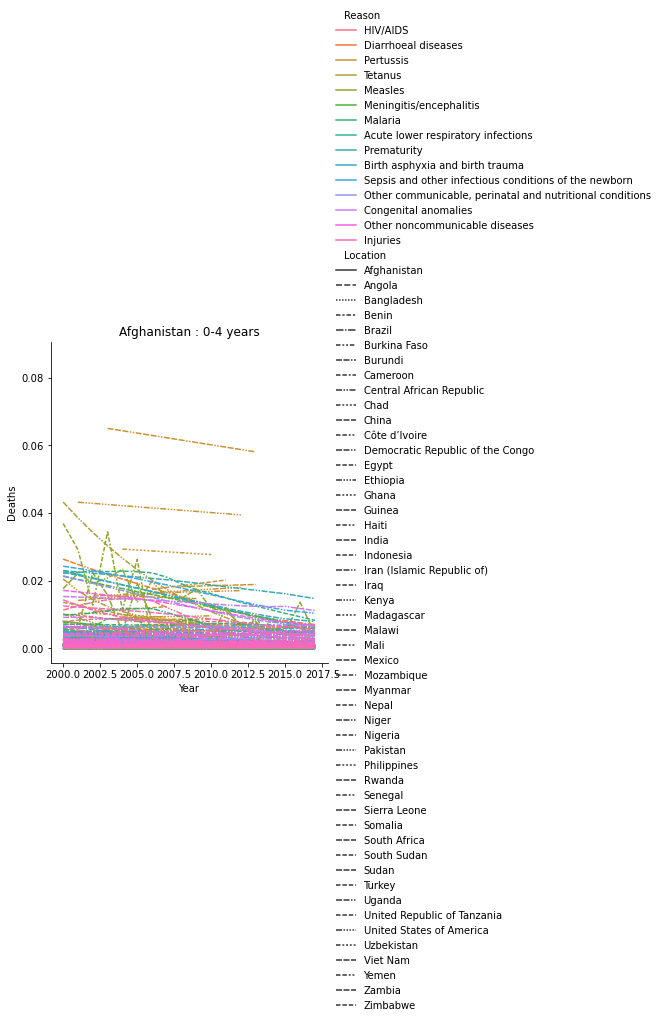

                      Year    Deaths  DeathsPercentage
Year              1.000000 -0.095285         -0.095285
Deaths           -0.095285  1.000000          1.000000
DeathsPercentage -0.095285  1.000000          1.000000


In [8]:
#Data Preprocessing for the Group 0-27 days

df_0_27_days = dataset_final.loc[(dataset_final.Category == '1')]
df_1_59_months = dataset_final.loc[(dataset_final.Category == '2')]
df_1_4_years = dataset_final.loc[(dataset_final.Category == '3')]

new_df_0_27_days = pd.DataFrame()
new_df_1_59_months = pd.DataFrame()
new_df_1_4_years = pd.DataFrame()

new_df_0_27_days = normalize_yearwise_deaths_diseases(df_0_27_days, new_df_0_27_days)
print(new_df_0_27_days.corr())
new_df_1_59_months = normalize_yearwise_deaths_diseases(df_1_59_months, new_df_1_59_months)
print(new_df_1_59_months.corr())
new_df_1_4_years = normalize_yearwise_deaths_diseases(df_1_4_years, new_df_1_4_years)
print(new_df_1_4_years.corr())

In [9]:
print(new_df_1_4_years)

           Location    Reason  Year   AgeGroup    Deaths SpaceTime Category  \
2       Afghanistan  HIV/AIDS  2017  0-4 years  0.000006       AFG        3   
5       Afghanistan  HIV/AIDS  2016  0-4 years  0.000006       AFG        3   
8       Afghanistan  HIV/AIDS  2015  0-4 years  0.000006       AFG        3   
11      Afghanistan  HIV/AIDS  2014  0-4 years  0.000006       AFG        3   
14      Afghanistan  HIV/AIDS  2013  0-4 years  0.000007       AFG        3   
...             ...       ...   ...        ...       ...       ...      ...   
147749     Zimbabwe  Injuries  2004  0-4 years  0.000227       ZWE        3   
147752     Zimbabwe  Injuries  2003  0-4 years  0.000207       ZWE        3   
147755     Zimbabwe  Injuries  2002  0-4 years  0.000189       ZWE        3   
147758     Zimbabwe  Injuries  2001  0-4 years  0.000174       ZWE        3   
147761     Zimbabwe  Injuries  2000  0-4 years  0.000162       ZWE        3   

        DeathsPercentage  
2               0.000614

In [25]:
temp_df = new_df_1_4_years[['Location', 'Year', 'Category', 'Deaths']]
temp_df.head()
#temp = new_df_1_4_years.groupby(['Location','Year'])
#temp.get_group(('Afghanistan','2000'))

,Location,Year,Category,Deaths
2,Afghanistan,2017,3,0.000006
5,Afghanistan,2016,3,0.000006
8,Afghanistan,2015,3,0.000006
11,Afghanistan,2014,3,0.000006
14,Afghanistan,2013,3,0.000007


In [39]:
print(temp_df[(temp_df.Location == 'Afghanistan') & (temp_df.Year == 2000)]['Deaths'].sum())

0.02001866648910499


In [43]:
cmi = temp_df.groupby(['Location', 'Year']).sum()
cmi.head()

Deaths
Location    Year          
Afghanistan 2000  0.020019
            2001  0.020602
            2002  0.018339
            2003  0.015605
            2004  0.014087

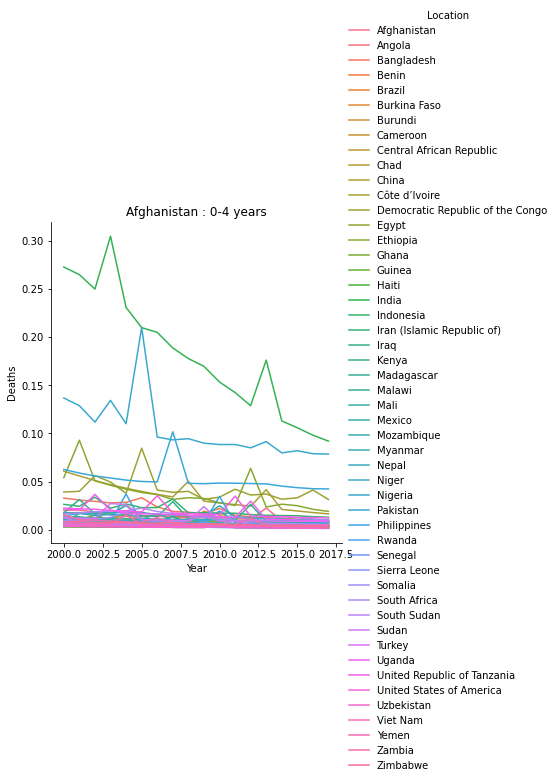

In [44]:
sns.relplot(x = "Year", y = "Deaths", hue = "Location", kind = "line", data = cmi).set(title=new_df_1_4_years.iloc[0]["Location"] 
                                                                                        + ' : ' + new_df_1_4_years.iloc[0]["AgeGroup"])